# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Carga optimizada del set de datos

In [2]:
zona_prop = pd.read_csv('train.csv', \
                               dtype = { \
                                        'id' : np.int32, \
                                        'tipodepropiedad' : 'category', \
                                        'provincia' : 'category', \
                                        'ciudad' : 'category', \
                                        'antiguedad' : np.float16, \
                                        'habitaciones' : np.float16, \
                                        'garages' : np.float16, \
                                        'banos' : np.float16, \
                                        'metroscubiertos' : np.float16, \
                                        'metrostotales' : np.float16, \
                                        'idzona' : np.float32, \
                                        'gimnasio' : 'bool', \
                                        'usosmultiples' : 'bool', \
                                        'piscina' : 'bool', \
                                        'escuelascercanas' : 'bool', \
                                        'centroscomercialescercanos' : 'bool', \
                                        'precio' : np.float32 \
                                       })

# Analisis de garage

In [16]:
cant_garage_nan = zona_prop['garages'].isnull().sum()
cant_garage_nan

37765

In [17]:
cant_garage_no_nan = (~zona_prop['garages'].isnull()).sum()
cant_garage_no_nan

202235

In [22]:
cant_propiedades = zona_prop.shape[0]
cant_propiedades

240000

## ¿Cuantas propiedades tienen NaN en garage?

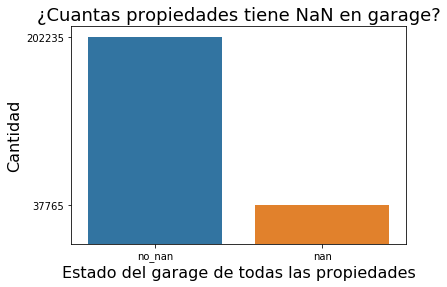

In [40]:
df_cant_garage_nan = pd.DataFrame(
    {'estado_garage' : ['no_nan', 'nan'], 
     'cantidad' : [
         cant_garage_no_nan, 
         cant_garage_nan
     ]}
    )
plot_bar_cant_garage_nan = sns.barplot(
                                x = df_cant_garage_nan['estado_garage'].get_values(),
                                y = df_cant_garage_nan['cantidad'].get_values()
                            )
plot_bar_cant_garage_nan.set_title(
    '¿Cuantas propiedades tiene NaN en garage?',
    fontsize = 18
)
plot_bar_cant_garage_nan.set_xlabel('Estado del garage de todas las propiedades', fontsize = 16)
plot_bar_cant_garage_nan.set_ylabel('Cantidad', fontsize = 16)
plot_bar_cant_garage_nan.set_yticks(df_cant_garage_nan['cantidad'].get_values())


Descartamos las propiedades con NaN en Garage para el analisis

In [44]:
zona_garages = zona_prop.dropna(subset = ['garages'])
zona_garages['garages'].isnull().sum()

0

## ¿Cuantas garages hay por propiedad?

In [45]:
zona_garages['garages'].value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [66]:
df_frecuencia_garages = zona_garages['garages'].value_counts().to_frame()
df_frecuencia_garages.reset_index(inplace = True)
df_frecuencia_garages.rename(columns = {'index' : 'cantidad', 'garages': 'frecuencia'}, inplace = True)
df_frecuencia_garages.sort_values(by = 'cantidad', inplace = True)
df_frecuencia_garages

,cantidad,frecuencia
2,0.0,26926
1,1.0,59464
0,2.0,94167
3,3.0,21678


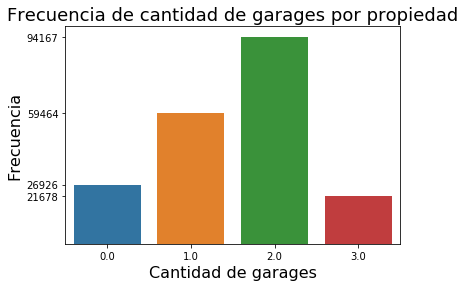

In [73]:
plot_bar_frecuencia_garages = sns.barplot(
                                x = df_frecuencia_garages['cantidad'],
                                y = df_frecuencia_garages['frecuencia']
                            )
plot_bar_frecuencia_garages.set_title(
    'Frecuencia de cantidad de garages por propiedad', 
    fontsize = 18
)
plot_bar_frecuencia_garages.set_xlabel('Cantidad de garages', fontsize = 16)
plot_bar_frecuencia_garages.set_ylabel('Frecuencia', fontsize = 16)
plot_bar_frecuencia_garages.set_yticks(df_frecuencia_garages['frecuencia'].get_values())
